<a href="https://colab.research.google.com/github/Shreeraj98/Statistical-Toolbox-for-easy-access/blob/main/Tools/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⏳ **Time Series Analysis**

Analyze trends and seasonality, and forecast future values with ARIMA or Prophet.

<ipython-input-1-f4337a4ca28f>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=periods, freq='M')


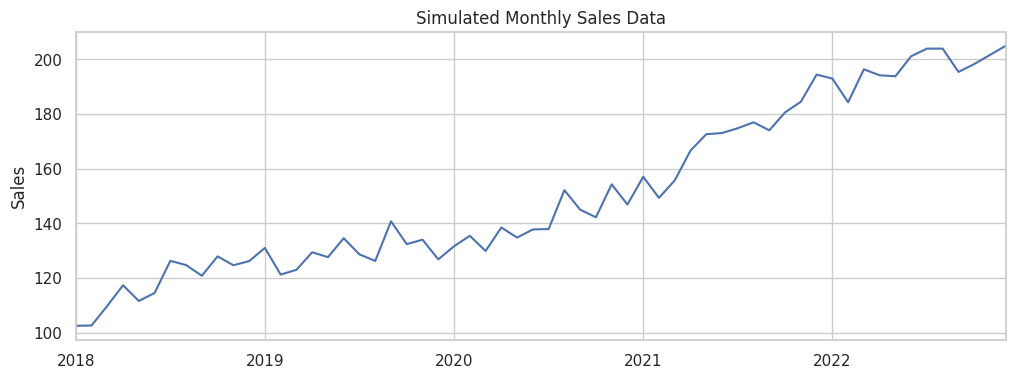

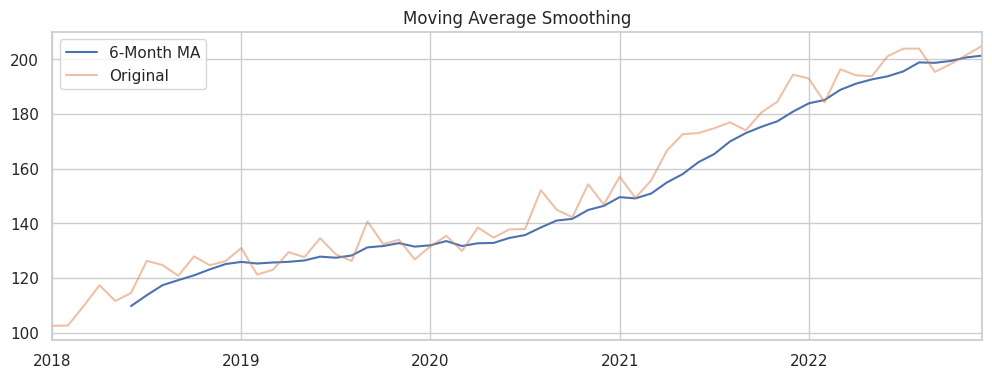

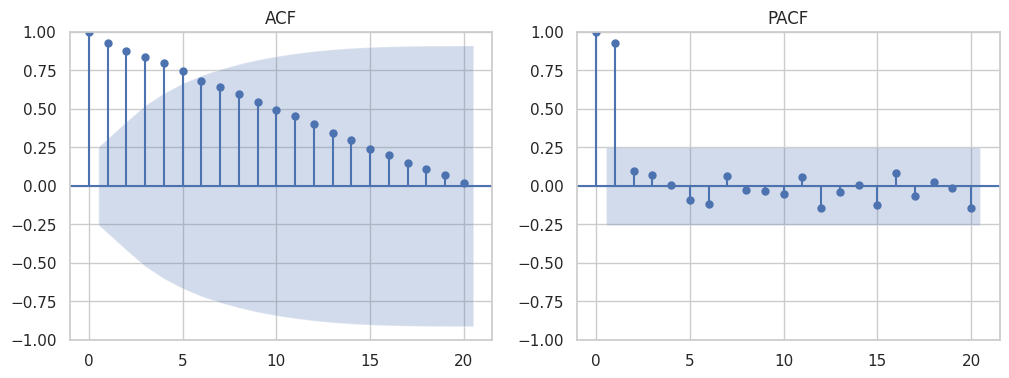

ADF Statistic: 0.030231172530373444
p-value: 0.9609619121406641
Critical Values: {'1%': np.float64(-3.5506699942762414), '5%': np.float64(-2.913766394626147), '10%': np.float64(-2.5946240473991997)}
⚠️ The series is non-stationary (differencing needed).
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.044
Date:                Mon, 05 May 2025   AIC                            388.088
Time:                        15:26:31   BIC                            394.320
Sample:                    01-31-2018   HQIC                           390.521
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

<ipython-input-1-f4337a4ca28f>:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


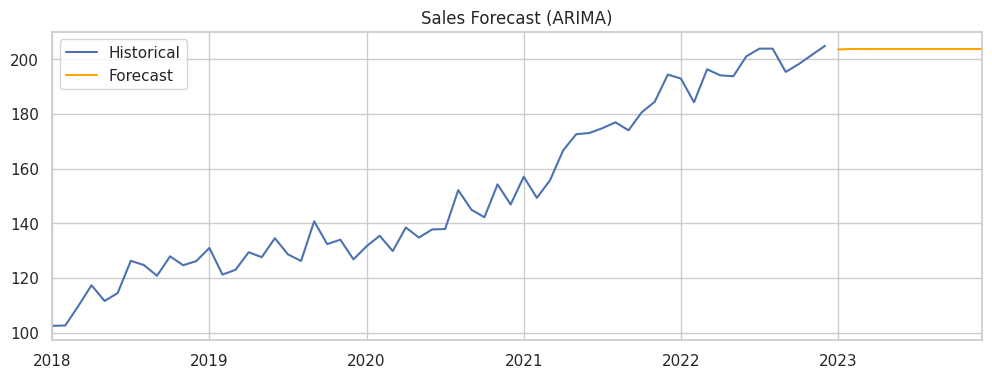

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

# Set plotting style
sns.set(style="whitegrid")

# -------------------------------------
# 📅 Simulate Monthly Sales Data
# -------------------------------------
np.random.seed(42)
periods = 60  # 5 years
dates = pd.date_range(start='2018-01-01', periods=periods, freq='M')
trend = np.linspace(100, 200, periods)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, periods))
noise = np.random.normal(0, 5, periods)
sales = trend + seasonality + noise

ts = pd.Series(sales, index=dates)

# -------------------------------------
# 📊 Visualize Time Series
# -------------------------------------
plt.figure(figsize=(12, 4))
ts.plot()
plt.title("Simulated Monthly Sales Data")
plt.ylabel("Sales")
plt.show()

# -------------------------------------
# 🔄 Moving Average (Trend Smoothing)
# -------------------------------------
plt.figure(figsize=(12, 4))
ts.rolling(window=6).mean().plot(label='6-Month MA')
ts.plot(alpha=0.5, label='Original')
plt.title("Moving Average Smoothing")
plt.legend()
plt.show()

# -------------------------------------
# 📉 ACF and PACF (Autocorrelation)
# -------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(ts, lags=20, ax=ax[1])
ax[0].set_title("ACF")
ax[1].set_title("PACF")
plt.show()

# -------------------------------------
# 📌 Augmented Dickey-Fuller Test (Check stationarity)
# -------------------------------------
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] < 0.05:
    print("✅ The series is stationary (good for ARIMA).")
else:
    print("⚠️ The series is non-stationary (differencing needed).")

# -------------------------------------
# 🔁 Fit ARIMA Model
# -------------------------------------
# ARIMA(p,d,q): We'll use (1,1,1) as a starting point
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# -------------------------------------
# 📈 Forecast Next 12 Months
# -------------------------------------
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot forecast
plt.figure(figsize=(12, 4))
ts.plot(label='Historical')
forecast_series.plot(label='Forecast', color='orange')
plt.title("Sales Forecast (ARIMA)")
plt.legend()
plt.show()
